In [418]:
# Importing Liberaries: 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.ticker as mticker
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import seaborn as sns

In [419]:
# loading the marketing dataset: 
marketing=pd.read_csv('marketing.csv')
marketing.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
0,a100000029,1/1/18,House Ads,personalization,True,English,English,0-18 years,1/1/18,NaN,House Ads,True
1,a100000030,1/1/18,House Ads,personalization,True,English,English,19-24 years,1/1/18,NaN,House Ads,True
2,a100000031,1/1/18,House Ads,personalization,True,English,English,24-30 years,1/1/18,NaN,House Ads,True
3,a100000032,1/1/18,House Ads,personalization,True,English,English,30-36 years,1/1/18,NaN,House Ads,True
4,a100000033,1/1/18,House Ads,personalization,True,English,English,36-45 years,1/1/18,NaN,House Ads,True


# Data Assessing

In [420]:
# Examining data types & null values: 
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_id              10037 non-null  object
 1   date_served          10021 non-null  object
 2   marketing_channel    10022 non-null  object
 3   variant              10037 non-null  object
 4   converted            10022 non-null  object
 5   language_displayed   10037 non-null  object
 6   language_preferred   10037 non-null  object
 7   age_group            10037 non-null  object
 8   date_subscribed      1856 non-null   object
 9   date_canceled        577 non-null    object
 10  subscribing_channel  1856 non-null   object
 11  is_retained          1856 non-null   object
dtypes: object(12)
memory usage: 941.1+ KB


In [421]:
# Dataset Description:
print(f'- The Marketing Dataset consists of {marketing.shape[0]} Rows and {marketing.shape[1]} Columns')
print (f'\n- The dataset consists of {marketing.user_id.nunique()} user.\n')
print(f'''
- The Data Selection: 
    Start: {marketing.date_served.astype('datetime64[ns]').min().strftime('%Y-%m-%d')} 
    End  : {marketing.date_served.astype('datetime64[ns]').max().strftime('%Y-%m-%d')}\n''')
print(f'''
- The Subscription Dates: 
    Start: {marketing.date_subscribed.astype('datetime64[ns]').min().strftime('%Y-%m-%d')} 
    End  : {marketing.date_subscribed.astype('datetime64[ns]').max().strftime('%Y-%m-%d')}\n''')
print(f'''
- The Subscription Cancellation occured within: 
    Start: {marketing.date_canceled.astype('datetime64[ns]').min().strftime('%Y-%m-%d')} 
    End  : {marketing.date_canceled.astype('datetime64[ns]').max().strftime('%Y-%m-%d')}\n''')
print('- The Marketing Channels are as follows:')
for x, y in enumerate(marketing.marketing_channel.unique()): 
    print('  ',x+1, '-', y)
print('\n- The Variant categories are as follows:')
for x, y in enumerate(marketing.variant.unique()): 
    print('  ',x+1, '-', y)
print('\n- The Converted column is classified into:')
for x, y in enumerate(marketing.converted.unique()): 
    print('  ',x+1, '-', y)
print('\n- The Displayed Languages are as follows:')
for x, y in enumerate(marketing.language_displayed.unique()): 
    print('  ',x+1, '-', y)
print('\n- The Preferred Languages are as follows:')
for x, y in enumerate(marketing.language_preferred.unique()): 
    print('  ',x+1, '-', y)
print('\n- The Age Groups are classified as follows:')
for x, y in enumerate(marketing.age_group.unique()): 
    print('  ',x+1, '-', y)
print('\n- The Subscribing Channels are as follows:')
for x, y in enumerate(marketing.subscribing_channel.unique()): 
    print('  ',x+1, '-', y)
print('\n- The is_retained column is classified into:')
for x, y in enumerate(marketing.is_retained.unique()): 
    print('  ',x+1, '-', y)

- The Marketing Dataset consists of 10037 Rows and 12 Columns

- The dataset consists of 7309 user.


- The Data Selection: 
    Start: 2018-01-01 
    End  : 2018-01-31


- The Subscription Dates: 
    Start: 2018-01-01 
    End  : 2018-01-31


- The Subscription Cancellation occured within: 
    Start: 2018-01-05 
    End  : 2018-05-09

- The Marketing Channels are as follows:
   1 - House Ads
   2 - Push
   3 - Facebook
   4 - Instagram
   5 - Email
   6 - nan

- The Variant categories are as follows:
   1 - personalization
   2 - control

- The Converted column is classified into:
   1 - True
   2 - False
   3 - nan

- The Displayed Languages are as follows:
   1 - English
   2 - German
   3 - Arabic
   4 - Spanish

- The Preferred Languages are as follows:
   1 - English
   2 - German
   3 - Arabic
   4 - Spanish

- The Age Groups are classified as follows:
   1 - 0-18 years
   2 - 19-24 years
   3 - 24-30 years
   4 - 30-36 years
   5 - 36-45 years
   6 - 45-55 years
   7 - 55+ y

In [422]:
# Summary Statistics
marketing.describe()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
count,10037,10021,10022,10037,10022,10037,10037,10037,1856,577,1856,1856
unique,7309,31,5,2,2,4,4,7,31,115,5,2
top,a100000882,1/15/18,House Ads,control,False,English,English,19-24 years,1/16/18,4/2/18,Instagram,True
freq,12,789,4733,5091,8946,9793,9275,1682,163,15,600,1279


In [423]:
# Identifying Duplicated Values:
if marketing.duplicated().sum() == 0: 
    print('The Dataset has no Duplicated Values')
else: 
    print(f'''
- The Dataset has {marketing.duplicated().sum()} Duplicated rows and their indexes are as follows:\n 
   "{", ".join(map(str,marketing[marketing.duplicated()].index.to_list()))}"''')


- The Dataset has 37 Duplicated rows and their indexes are as follows:
 
   "470, 478, 894, 895, 954, 955, 1004, 1005, 1027, 1047, 1051, 3022, 3166, 3196, 3198, 3310, 3498, 3642, 3801, 3803, 4083, 4124, 4129, 4134, 6880, 7440, 7488, 8452, 8454, 8456, 8458, 8486, 8488, 8500, 8502, 8504, 8506"


In [424]:
# Identifying the Null Values:
if marketing.isna().sum().sum() == 0: 
    print('The Dataset has no NULL Values')
else: 
    print(f'''The Dataset has {marketing.isna().sum().sum()} NULL Values that are distributed as follows: ''')
marketing.isna().sum().reset_index().rename(columns={'index':'Column_Name',0:'NULLs_Count'}).style.hide()

The Dataset has 34049 NULL Values that are distributed as follows: 


Column_Name,NULLs_Count
user_id,0
date_served,16
marketing_channel,15
variant,0
converted,15
language_displayed,0
language_preferred,0
age_group,0
date_subscribed,8181
date_canceled,9460


In [425]:
# Detemining the indexes of the null values for columns:
# 1- date_served
print(f'''
- The date_served column has {marketing.date_served.isna().sum()} null values and their indexes are as follows:\n 
    "{", ".join(map(str,marketing[marketing.date_served.isna()==True].index.to_list()))}"\n''') 

# 2- marketing_channel
print(f'''
- The marketing_channel column has {marketing.marketing_channel.isna().sum()} null values and their indexes are as follows:\n 
    "{", ".join(map(str,marketing[marketing.marketing_channel.isna()==True].index.to_list()))}"\n''') 

# 3- converted
print(f'''
- The converted column has {marketing.converted.isna().sum()} null values and their indexes are as follows:\n 
    "{", ".join(map(str,marketing[marketing.converted.isna()==True].index.to_list()))}"\n''')


- The date_served column has 16 null values and their indexes are as follows:
 
    "7038, 9944, 9945, 9946, 9947, 9948, 9949, 9950, 9951, 9952, 9953, 9954, 9955, 9956, 9957, 9958"


- The marketing_channel column has 15 null values and their indexes are as follows:
 
    "9944, 9945, 9946, 9947, 9948, 9949, 9950, 9951, 9952, 9953, 9954, 9955, 9956, 9957, 9958"


- The converted column has 15 null values and their indexes are as follows:
 
    "9944, 9945, 9946, 9947, 9948, 9949, 9950, 9951, 9952, 9953, 9954, 9955, 9956, 9957, 9958"



# Data Cleaning: 
## 1- Removing Duplicates


In [426]:
marketing.drop_duplicates(inplace=True)
if marketing.duplicated().sum() == 0: 
    print(f'The Dataset has no Duplicated Values with {marketing.shape[0]} Row')
else: 
    print(f'''
The Dataset has {marketing.duplicated().sum()} Duplicated rows and their indexes are as follows:\n 
{", ".join(map(str,marketing[marketing.duplicated()].index.to_list()))}''')

The Dataset has no Duplicated Values with 10000 Row


In [427]:
marketing.describe()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
count,10000,9984,9985,10000,9985,10000,10000,10000,1845,575,1845,1845
unique,7309,31,5,2,2,4,4,7,31,115,5,2
top,a100000882,1/15/18,House Ads,control,False,English,English,19-24 years,1/16/18,4/1/18,Instagram,True
freq,12,786,4704,5069,8911,9757,9243,1676,162,14,594,1270


## 2- Changing Dates data Type
- ***date_served:*** _str_ to _date_
- ***date_subscribed:*** _str_ to _date_
- ***date_canceled:*** _str_ to _date_


In [428]:
# Changing the data type of date_served: 
marketing['date_served']=pd.to_datetime(marketing['date_served'])
marketing['date_served'].dtype

dtype('<M8[ns]')

In [429]:
# Changing the data type of date_subscribed: 
marketing['date_subscribed']=pd.to_datetime(marketing['date_subscribed'])
marketing['date_subscribed'].dtype

dtype('<M8[ns]')

In [430]:
# Changing the data type of date_canceled: 
marketing['date_canceled']=pd.to_datetime(marketing['date_canceled'])
marketing['date_canceled'].dtype

dtype('<M8[ns]')

## 3- Handling Nulls:
- ***Shared nulls across date_served (except for index 7038), marketing_channel, converted:*** <br>
    Since those columns share the same missing rows, dropping them together avoids keeping incomplete entries that would otherwise distort the analysis.

- ***date_served (index 7038):*** <br>
    Since this is an isolated null in the middle of the dataset, forward-filling (ffill) after sorting by date is a reasonable strategy.


- There is no need to handle the missing values in ***date_subscribed, date_canceled,	subscribing_channel, and is_retained*** as these values are naturally missing depending on whether the user subscribed or not. Filling them would introduce bias.


In [431]:
# Dropping Shared nulls across date_served (except for index 7038), marketing_channel, converted: 
marketing.dropna(subset='marketing_channel', inplace=True)

In [432]:
# Nulls at date_served column 
print(f'''
The date_served column has {marketing.date_served.isna().sum()} null value and its index is {", ".join(map(str,marketing[marketing.date_served.isna()==True].index.to_list()))}\n''')


The date_served column has 1 null value and its index is 7038



In [433]:
# date_served (index 7038):
# Sorting the table by date served
marketing=marketing.sort_values('date_served') 

# Replacing null by forward fill method 
marketing.date_served.fillna(method='ffill', inplace=True)

# Checking:
if marketing.date_served.isna().sum() == 0: 
    print(f'The Null values in date_served Column has been handeled, resulting in a {marketing.date_served.isna().sum()} Null Value for this column')
else: 
    print(f'''The date_served Column has {marketing.date_served.isna().sum()} NULL Values ''')

The Null values in date_served Column has been handeled, resulting in a 0 Null Value for this column


In [434]:
# Checking for Null Values:
if marketing.isna().sum().sum() == 0: 
    print('The Dataset has no NULL Values')
else: 
    print(f'''The Dataset has {marketing.isna().sum().sum()} NULL Values that are distributed as follows: ''')
marketing.isna().sum().reset_index().rename(columns={'index':'Column_Name',0:'NULLs_Count'}).style.hide()

The Dataset has 33830 NULL Values that are distributed as follows: 


Column_Name,NULLs_Count
user_id,0
date_served,0
marketing_channel,0
variant,0
converted,0
language_displayed,0
language_preferred,0
age_group,0
date_subscribed,8140
date_canceled,9410


## 4- Changing converted data type 
- ***converted:*** _str_ to _boolean_

In [435]:
# Changing the data type of converted: 
marketing['converted']=marketing['converted'].astype('bool')
marketing['converted'].dtype

dtype('bool')

## 4- Adding New Columns:
- ***is_house_ad:*** Identifies if a particular marketing asset was a house ad or not _(since it is the most frequent value in this column "4733 out of 10000")_
- ***matched_lang:*** conveys whether the ad was shown to the user in their preferred language
- ***dow:*** service Days starting from Monday till Sunday, t measure the most frequent days

In [436]:
# Adding the is_house_ad Column
marketing['is_house_ad']=[
    True if x=="House Ads" 
    else False for x in marketing.marketing_channel]
marketing.loc[:,['marketing_channel','is_house_ad']].sample(5)

,marketing_channel,is_house_ad
8067,House Ads,True
5688,House Ads,True
6845,House Ads,True
785,Email,False
1917,Facebook,False


In [437]:
# Adding matched_lang Column 
marketing['matched_lang']=np.where(marketing['language_displayed']==marketing['language_preferred'],True,False)
marketing.loc[:,['language_displayed','language_preferred','matched_lang']].sample(5)

,language_displayed,language_preferred,matched_lang
634,English,English,True
5963,English,English,True
1409,English,English,True
6879,English,German,False
719,English,English,True


In [438]:
# Adding dow column: 
marketing['dow']= ['Mo' if x==0
                  else 'Tu' if x== 1
                  else 'We' if x==2
                  else 'Th' if x==3
                  else 'Fr' if x==4
                  else 'Sa' if x==5
                  else 'Su'for x in marketing.date_served.dt.dayofweek]
marketing.loc[:,['date_served','dow']].sample(5)


,date_served,dow
69,2018-01-04,Th
6367,2018-01-08,Mo
3648,2018-01-23,Tu
1258,2018-01-24,We
1443,2018-01-08,Mo


## 5- Mapping values to existing columns
> ***Note:*** _Due to the way pandas stores data, in a large dataset, it can be computationally inefficient to store columns of strings. In such cases, it can speed things up to instead store these values as numbers._

- ***marketing_channel*** will be as follows:
   - _House Ads = 1_
   - _Push = 2_
   - _Facebook = 3_
   - _Instagram = 4_
   - _Email = 5_

In [439]:
# Mapping marketing_channel column:
ch_dict={'House Ads' : 1,'Push' : 2,'Facebook' : 3,'Instagram' : 4,'Email' : 5}
marketing['ch_code']=marketing.marketing_channel.map(ch_dict).astype('Int64')
marketing.loc[:,['marketing_channel','ch_code']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9985 entries, 0 to 7038
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   marketing_channel  9985 non-null   object
 1   ch_code            9985 non-null   Int64 
dtypes: Int64(1), object(1)
memory usage: 243.8+ KB


# Data Exploring
## $\color{#805D87}{Initial\;Investigation}$

In [440]:
# Number of daily users :
daily_users = marketing.groupby(['date_served','dow']).user_id.count().reset_index()\
                        .rename(columns={'date_served':'Date','user_id':'Num_Users'})

daily_users.style.hide()

Date,dow,Num_Users
2018-01-01 00:00:00,Mo,375
2018-01-02 00:00:00,Tu,413
2018-01-03 00:00:00,We,383
2018-01-04 00:00:00,Th,336
2018-01-05 00:00:00,Fr,331
2018-01-06 00:00:00,Sa,315
2018-01-07 00:00:00,Su,280
2018-01-08 00:00:00,Mo,319
2018-01-09 00:00:00,Tu,315
2018-01-10 00:00:00,We,341


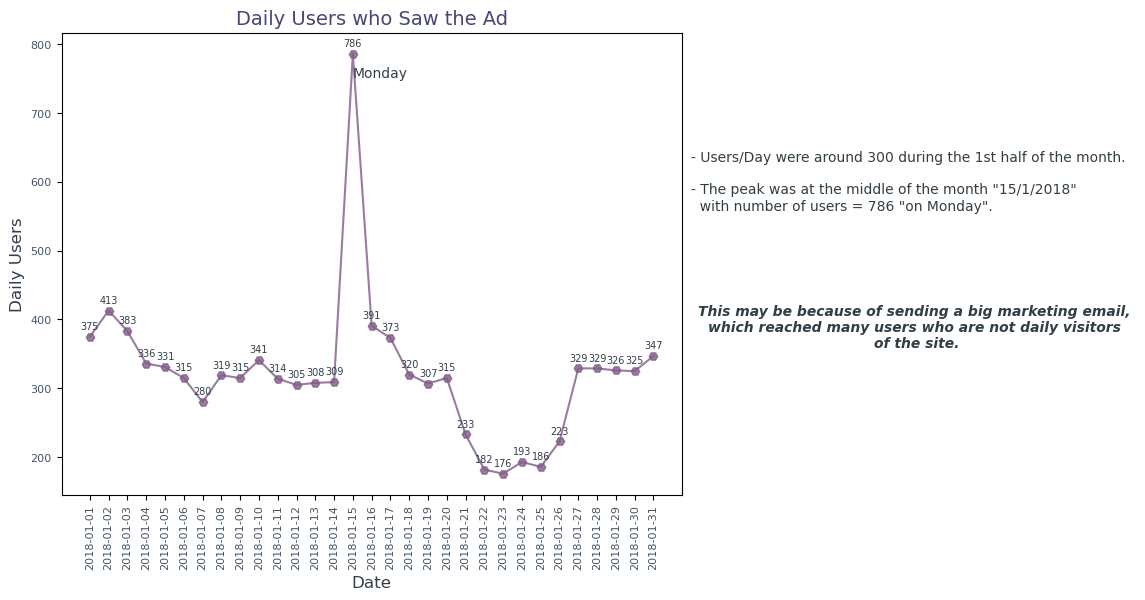

In [441]:
# Visualization: 
# Data
x= daily_users.Date.astype('str').to_list()
y= daily_users.Num_Users

# Creating the Line Chart
plt.subplots(figsize = (8,6))
plt.plot(x,y,color='#805D87',marker = 'H', alpha=.8)

# Customizing Chart
plt.title('Daily Users who Saw the Ad',fontsize=14,color='#454775')
plt.xlabel('Date',fontsize=12,color='#313E4C')
plt.xticks(rotation=90,fontsize=8,color='#415366')
plt.ylabel('Daily Users',fontsize=12,color='#313E4C')
plt.yticks(fontsize=8,color='#415366')

# Data Annotation with values
for i, v in enumerate(y):
  plt.text(i,v+15, f"{v:.0f}", ha='center', va='center',fontsize=7,color='#313E4C')

# Findings
text1 ='''
- Users/Day were around 300 during the 1st half of the month.\n
- The peak was at the middle of the month "15/1/2018" 
  with number of users = 786 "on Monday".\n'''

text2='''
This may be because of sending a big marketing email, 
which reached many users who are not daily visitors 
of the site.'''

plt.text(32,600,text1,va='center',ha='left',color='#313E45')
plt.text(44,400,text2,va='center',ha='center',color='#313E45',fontstyle='italic',weight='semibold', fontsize=10)
plt.text('2018-01-15', 767, 'Monday',va='top', ha='left',color='#313E4C');

In [442]:
# Number of weekday users :
weekday_users = marketing.groupby(['dow']).user_id.count().reset_index()\
                        .rename(columns={'dow':'Day','user_id':'Num_Users'})\
                        .sort_values('Num_Users', ascending=False)

weekday_users.style.hide()

Day,Num_Users
Mo,1988
We,1637
Tu,1620
Sa,1267
Fr,1166
Th,1156
Su,1151


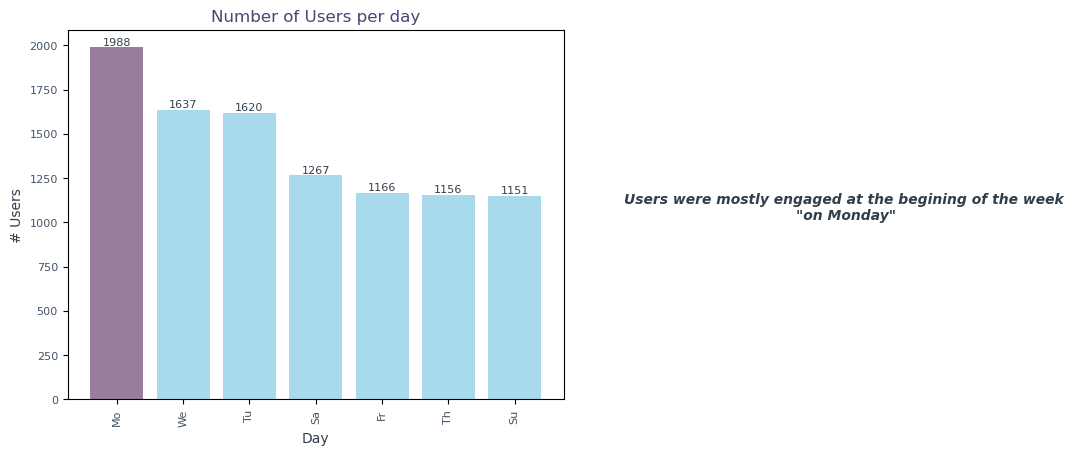

In [443]:
# Visualization:
# Data
x= weekday_users.Day.to_list()
y=weekday_users.Num_Users

# Define bar colors based on performance
colors = ['#805D87' if n == y.max() else '#94D1E7' for n in y]

# Create the bar chart
plt.bar(x,y, color=colors, alpha=.8)

# Customizing Chart
plt.title('Number of Users per day',fontsize=12,color='#454775')
plt.xlabel('Day',fontsize=10,color='#313E4C')
plt.xticks(rotation=90,fontsize=8, color='#415366')
plt.ylabel('# Users',fontsize=10,color='#313E4C')
plt.yticks(fontsize=8, color='#415366')

# Annotate bars with their values
for i, v in enumerate(y):
  plt.text(i,v+.003, f"{v:.0f}", ha='center', va='bottom',fontsize=8,color='#313E4C') 

# Findings
text = ''' 
Users were mostly engaged at the begining of the week 
"on Monday"'''
plt.text(11,1000,text,va='bottom',ha='center' ,color='#313E4C',
         fontstyle='italic',weight='semibold',fontsize=10);

In [444]:
# Number of users according to variant categories 
var_users = marketing.groupby('variant')['user_id'].count().reset_index()\
                     .rename(columns={'user_id':"num_users",})

var_users['pct']=(var_users.num_users/var_users.num_users.sum())

var_users.style.hide().format({'pct':'{:,.2%}'})

variant,num_users,pct
control,5054,50.62%
personalization,4931,49.38%


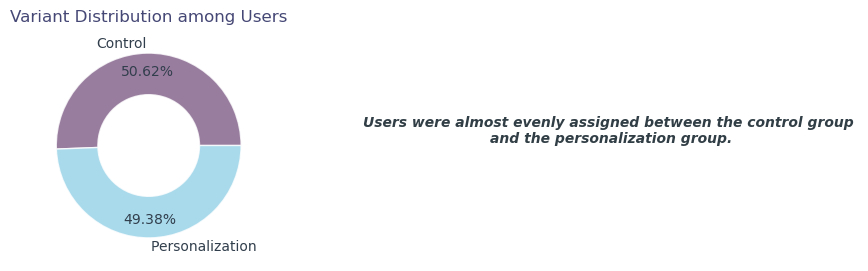

In [445]:
# Visualization: 
# Defining colors based on performance
colors = ['#805D87' if x == var_users.pct.max() else '#94D1E7' for x in var_users.pct]

# Creating the Chart
size = 0.45
label_var = 'Control','Personalization '
plt.subplots(figsize = (3,3))
wedges, texts, autotexts=plt.pie(var_users.pct, radius=1, colors= colors,labels = label_var,autopct='%1.2f%%',
                                 pctdistance=.8,textprops={'fontsize': 10,'color':'#313E4C'}, 
                                 wedgeprops=dict(width=size, edgecolor='w'))

# Customizing Chart
for w in wedges:
    w.set_alpha(0.8)  
plt.title('Variant Distribution among Users', fontsize=12,color='#454775')

# Findings
text = ''' 
Users were almost evenly assigned between the control group 
and the personalization group.'''
plt.text(5,0,text,ha='center',va='bottom',fontsize = 10, 
         weight = 'semibold',fontstyle='italic',color='#313E45');


In [451]:
# Number of converted users vs. non-converted users
converted_users = marketing.groupby('converted')['user_id'].count().reset_index()\
                     .rename(columns={'user_id':"num_users",})

converted_users['pct']=(converted_users.num_users/converted_users.num_users.sum())

converted_users.style.hide().format({'pct':'{:,.2%}'})

converted,num_users,pct
False,8911,89.24%
True,1074,10.76%


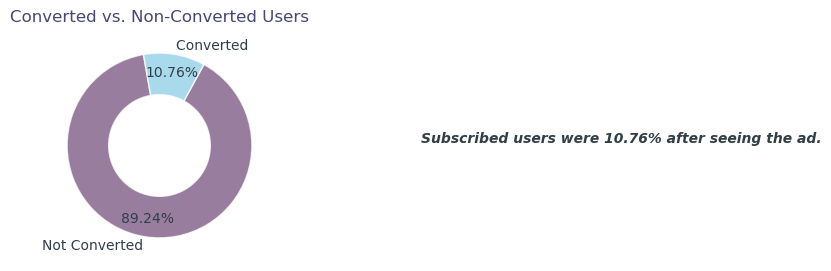

In [447]:
# Visualization: 
# Defining colors based on performance
colors = ['#805D87' if n == converted_users.pct.max() else '#94D1E7' for n in converted_users.pct]

# Creating the Chart
size = 0.45
label_con = 'Not Converted','Converted '
plt.subplots(figsize = (3,3))
wedges, texts, autotexts=plt.pie(converted_users.pct, radius=1, colors= colors,labels = label_con,autopct='%1.2f%%',
                                 pctdistance=.8,textprops={'fontsize': 10,'color':'#313E4C',}, 
                                 wedgeprops=dict(width=size, edgecolor='w'),startangle=100)

# Customizing the Chart
for w in wedges:
    w.set_alpha(0.8) 
    
plt.title('Converted vs. Non-Converted Users', fontsize=12,color='#454775')

# Findings
text = ''' 
Subscribed users were 10.76% after seeing the ad.'''
plt.text(5,0,text,ha='center',va='bottom',fontsize = 10, 
         weight = 'semibold',fontstyle='italic',color='#313E45');

In [448]:
# Displayed Lanaguage vs. Preferred Language
lang_displayed=marketing.groupby('language_displayed')['user_id'].count().reset_index()\
                        .rename(columns={'language_displayed':'Language','user_id':'Displayed'})

lang_preferred=marketing.groupby('language_preferred')['user_id'].count().reset_index()\
                       .rename(columns={'language_preferred':'Language','user_id':'Preferred'})

lang=lang_displayed.merge(lang_preferred,on='Language').sort_values('Displayed')

lang.style.hide()

Language,Displayed,Preferred
Arabic,27,145
German,81,166
Spanish,135,446
English,9742,9228


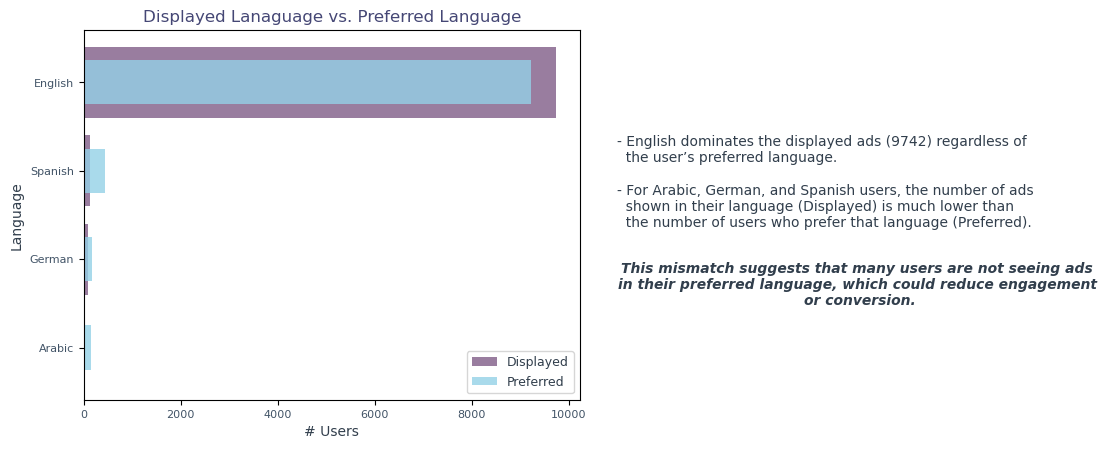

In [450]:
# Visualization
# Data
x=lang.Language.to_list()
y=lang.Displayed
z=lang.Preferred

# Creating the Chart
bin_size=.5
plt.barh(x,y, label='Displayed',color='#805D87',alpha=.8)
plt.barh(x,z,bin_size,label='Preferred', color='#94D1E7',alpha=.8)

# Chart Customization
plt.title('Displayed Lanaguage vs. Preferred Language', fontsize=12,color='#454775')
plt.xlabel('# Users', fontsize=10,color='#313E4C')
plt.xticks(fontsize=8,color='#415366')
plt.ylabel('Language', fontsize=10,color='#313E4C')
plt.yticks(fontsize=8,color='#415366')
plt.legend(fontsize=9,labelcolor='#313E4C')

# Findings
text1='''
- English dominates the displayed ads (9742) regardless of 
  the user’s preferred language.\n
- For Arabic, German, and Spanish users, the number of ads 
  shown in their language (Displayed) is much lower than 
  the number of users who prefer that language (Preferred).\n
'''
text2='''
This mismatch suggests that many users are not seeing ads 
in their preferred language, which could reduce engagement 
or conversion.
'''
plt.text(11000,1,text1,color='#313E4C'),
plt.text(16000,.3,text2, ha='center',fontstyle='italic',weight='semibold', fontsize=10, color='#313E4C');

In [93]:
# Distribution of age among users
age_distribution = marketing.groupby('age_group').user_id.nunique().reset_index()\
                            .rename(columns={'user_id':'num_users'})

age_distribution['pct']=age_distribution['num_users']/age_distribution['num_users'].sum()

age_distribution.style.hide().format({'pct':'{:,.2%}'})

age_group,num_users,pct
0-18 years,1206,15.31%
19-24 years,1304,16.56%
24-30 years,1218,15.46%
30-36 years,1057,13.42%
36-45 years,1056,13.41%
45-55 years,1056,13.41%
55+ years,979,12.43%


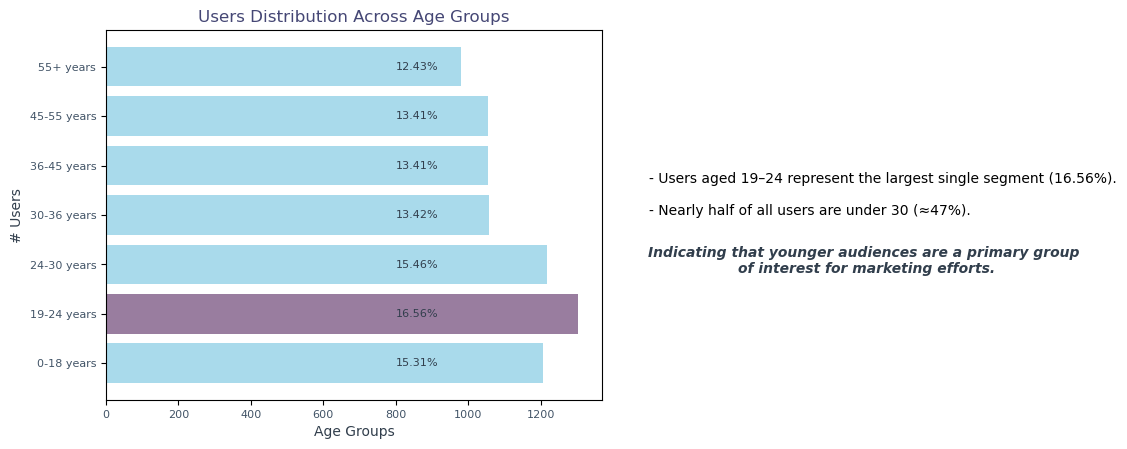

In [471]:
# Visualization
# Data
x= age_distribution.age_group.to_list()
y=age_distribution.num_users

# Defining colors based on performance
colors = ['#805D87' if n == y.max() else '#94D1E7' for n in y] 

# Creating the chart
plt.barh(x,y,alpha=.8,color=colors)

# Customizing the Chart
plt.title('Users Distribution Across Age Groups', fontsize=12,color='#454775')
plt.xlabel('Age Groups', fontsize=10,color='#313E4C')
plt.xticks(fontsize=8, color='#415366')
plt.ylabel('# Users', fontsize=10,color='#313E4C')
plt.yticks(fontsize=8, color='#415366')

# Annotating bars with values
for i,v in enumerate(age_distribution.pct):
    plt.text(v+800,i,f'{v:.2%}',va='center',ha='left',fontsize=8,color='#313E4C')
    
# Findings
text1= '''
- Users aged 19–24 represent the largest single segment (16.56%).\n
- Nearly half of all users are under 30 (≈47%).'''
text2=''' 
Indicating that younger audiences are a primary group 
of interest for marketing efforts.
'''
plt.text(1500,3,text1,color='#313E4C')
plt.text(2100,1.5,text2, ha='center',fontstyle='italic',
         weight='semibold', fontsize=10, color='#313E4C');

In [95]:
# Number of users for each marketing channel:
ch_users=marketing.groupby('marketing_channel').user_id.count().reset_index().rename(columns={'user_id':"num_users"})\
                  .sort_values('num_users')
ch_users['pct']=ch_users.num_users/ch_users.num_users.sum()
ch_users.style.hide().format({'pct':'{:.2%}'})

marketing_channel,num_users,pct
Email,563,5.64%
Push,991,9.92%
Facebook,1859,18.62%
Instagram,1868,18.71%
House Ads,4704,47.11%


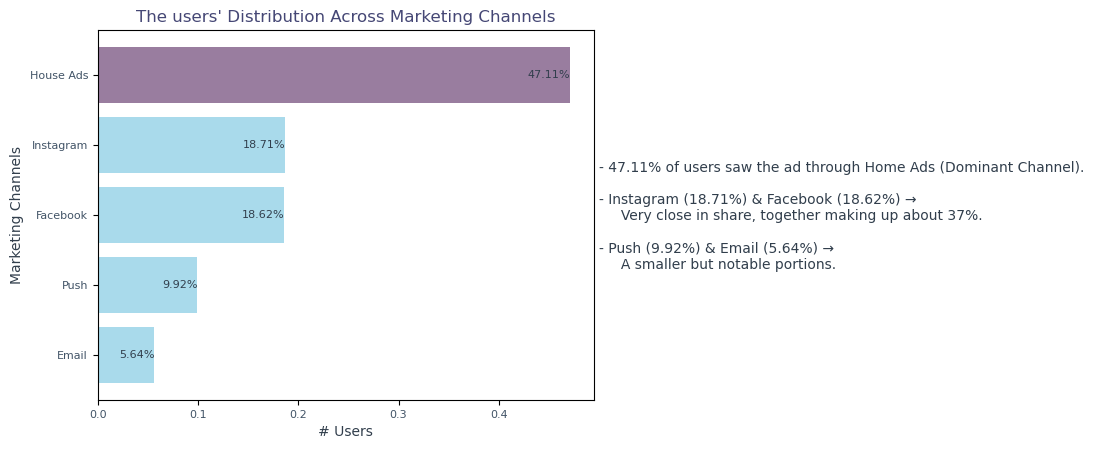

In [478]:
# Visualization: 
# Data
x= ch_users.marketing_channel.to_list()
y= ch_users.pct

# Defining colors based on performance
colors = ['#805D87' if n == y.max() else '#94D1E7' for n in y] 

# Creating the chart
plt.barh(x,y, color=colors, alpha=.8)

#Customizing the chart
plt.title("The users' Distribution Across Marketing Channels", fontsize=12,color='#454775')
plt.xlabel('# Users', fontsize=10,color='#313E4C')
plt.xticks(fontsize=8, color='#415366')
plt.ylabel('Marketing Channels', fontsize=10,color='#313E4C')
plt.yticks(fontsize=8, color='#415366')
for i, v in enumerate(y):
    plt.text(v,i,f'{v:.2%}',ha='right', va='center',fontsize=8,color='#313E4C')

# Findings
text='''
- 47.11% of users saw the ad through Home Ads (Dominant Channel).\n
- Instagram (18.71%) & Facebook (18.62%) → 
     Very close in share, together making up about 37%.\n
- Push (9.92%) & Email (5.64%) → 
     A smaller but notable portions.
'''
plt.text(.5,1,text,color='#313E4C');

In [479]:
# Subscribing Channels
sub_channel=marketing.groupby('subscribing_channel')['user_id'].count().reset_index()\
                     .rename(columns={'user_id':'subscribers_num'})\
                     .sort_values('subscribers_num')

sub_channel.style.hide()

subscribing_channel,subscribers_num
Push,167
Email,286
House Ads,354
Facebook,444
Instagram,594


In [480]:
# Retained Subscribers 
retained = marketing.query('is_retained == True').groupby('subscribing_channel').is_retained.count().reset_index()\
                    .rename(columns={'is_retained':'retained_num'}).sort_values('retained_num') 

retained.style.hide()

subscribing_channel,retained_num
Push,122
House Ads,198
Email,211
Facebook,320
Instagram,419


In [99]:
# Merging subscribing channeles and retained subscribers
subscribers = sub_channel.merge(retained,on='subscribing_channel')

subscribers['retained_pct']=subscribers['retained_num']/subscribers['subscribers_num']

subscribers['middle_pt']=(subscribers['subscribers_num']/2)

subscribers.style.hide().format({'retained_pct':'{:.2%}','middle_pt':'{:.0f}'})

subscribing_channel,subscribers_num,retained_num,retained_pct,middle_pt
Push,167,122,73.05%,84
Email,286,211,73.78%,143
House Ads,354,198,55.93%,177
Facebook,444,320,72.07%,222
Instagram,594,419,70.54%,297


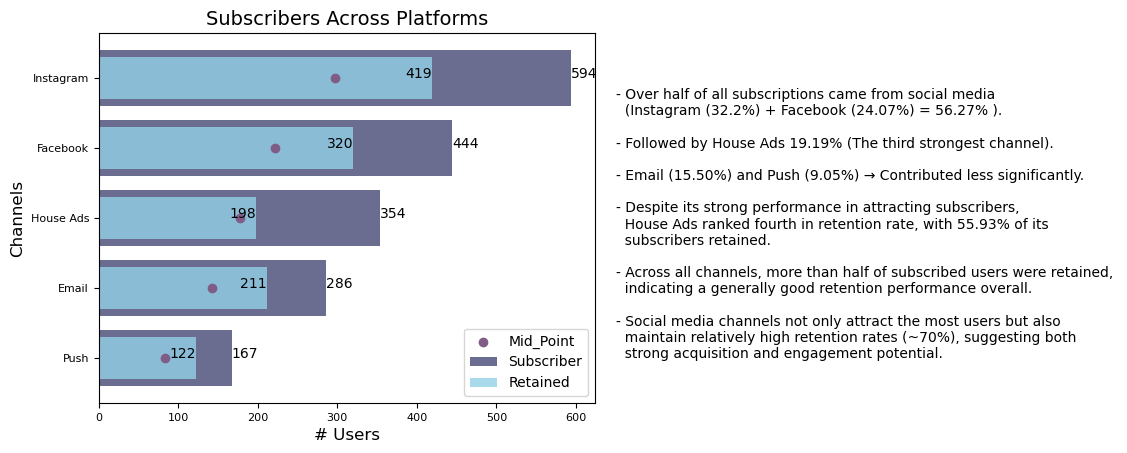

In [100]:
# Visualization 
# Data
x= subscribers.subscribing_channel.to_list()
y= subscribers.subscribers_num
z=subscribers.retained_num
mid_point=subscribers.middle_pt

# Creating the chart
size=.6
plt.barh(x,y,alpha=.8, color='#454775', label='Subscriber')
plt.barh(x,z,size,alpha=.8, color='#94D1E7',label='Retained')
plt.scatter(mid_point,x, label='Mid_Point', color = '#805D87')

# Customizing the chart
plt.title('Subscribers Across Platforms',fontsize=14)
plt.ylabel('Channels', fontsize=12)
plt.yticks(fontsize=8)
plt.xlabel('# Users', fontsize=12)
plt.xticks(fontsize=8)
plt.legend(fontsize=9,labelcolor='#313E4C') 

# Annotating bars with values
for i,v in enumerate(y): 
    plt.text(v,i,v)
for i,v in enumerate(z): 
    plt.text(v,i,v,ha='right')

# Findings
text=''' 
- Over half of all subscriptions came from social media 
  (Instagram (32.2%) + Facebook (24.07%) = 56.27% ).\n
- Followed by House Ads 19.19% (The third strongest channel).\n 
- Email (15.50%) and Push (9.05%) → Contributed less significantly.\n
- Despite its strong performance in attracting subscribers, 
  House Ads ranked fourth in retention rate, with 55.93% of its 
  subscribers retained.\n
- Across all channels, more than half of subscribed users were retained, 
  indicating a generally good retention performance overall.\n
- Social media channels not only attract the most users but also 
  maintain relatively high retention rates (~70%), suggesting both 
  strong acquisition and engagement potential.'''
plt.text(650,0,text)

plt.show()

## $\color{#805D87}{Q1:}$ ***Was the campaign successful?***

In [266]:
# Calculating The Overall Conversion Rate
converted_users= marketing.query('converted == True')
converted=converted_users.user_id.nunique()
total_users = marketing.user_id.nunique()
conversion_rate = converted/total_users
print(f'Conversion Rate = {round(conversion_rate*100,2)}%')

# Calculating The Overall Retention Rate (spaning 1 month)
retained_users = converted_users.query('is_retained == True')
retained=retained_users.user_id.nunique()
retention_rate = retained/converted
print(f'Retention Rate = {round(retention_rate*100,2)}%')

Conversion Rate = 13.92%
Retention Rate = 64.53%


In [103]:
# Calculating Conversion Rate across marketing channels
conversion_ch=converted_users.groupby('subscribing_channel').user_id.nunique().reset_index()\
                             .rename(columns={'subscribing_channel':'channel','user_id':'converted'})
users_ch = marketing.groupby('marketing_channel').user_id.nunique().reset_index()\
                    .rename(columns={'marketing_channel':'channel','user_id':'total_users'})
conversion =users_ch.merge(conversion_ch, on ='channel')
conversion['conversion_rate']=conversion['converted']/conversion['total_users']
conversion = conversion.sort_values('conversion_rate', ascending= False)
conversion.style.hide().format({'conversion_rate':'{:,.2%}'})

channel,total_users,converted,conversion_rate
Email,553,161,29.11%
Instagram,1740,232,13.33%
Facebook,1758,221,12.57%
Push,972,77,7.92%
House Ads,3968,298,7.51%


In [104]:
# Calculating Retention Rate across marketing channels
retained_ch=retained_users.groupby('subscribing_channel').user_id.nunique().reset_index()\
                             .rename(columns={'subscribing_channel':'channel','user_id':'retained'})
retention = conversion_ch.merge(retained_ch, on='channel')
retention['retention_rate']=retention['retained']/retention['converted']
retention=retention.sort_values('retention_rate', ascending=False)
retention.style.hide().format({'retention_rate':'{:,.2%}'})

channel,converted,retained,retention_rate
Email,161,118,73.29%
Push,77,54,70.13%
Facebook,221,152,68.78%
Instagram,232,158,68.10%
House Ads,298,173,58.05%


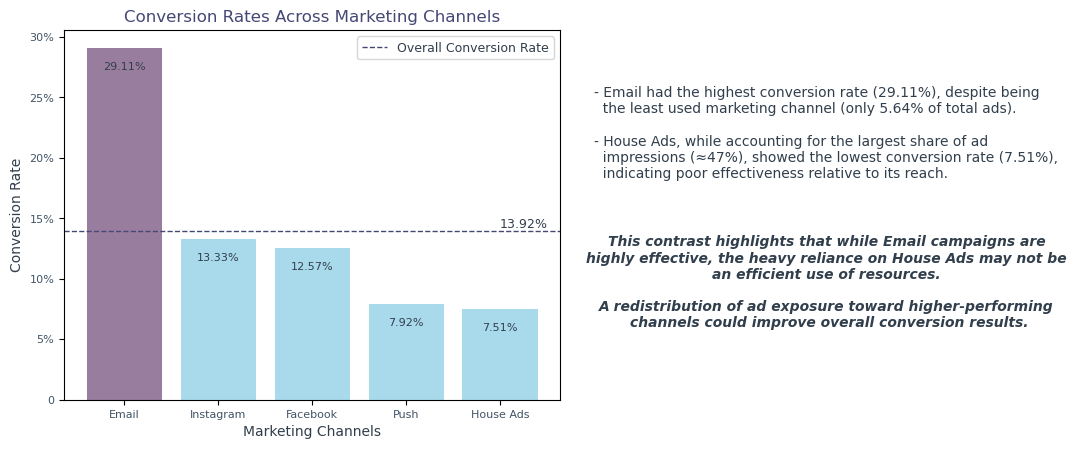

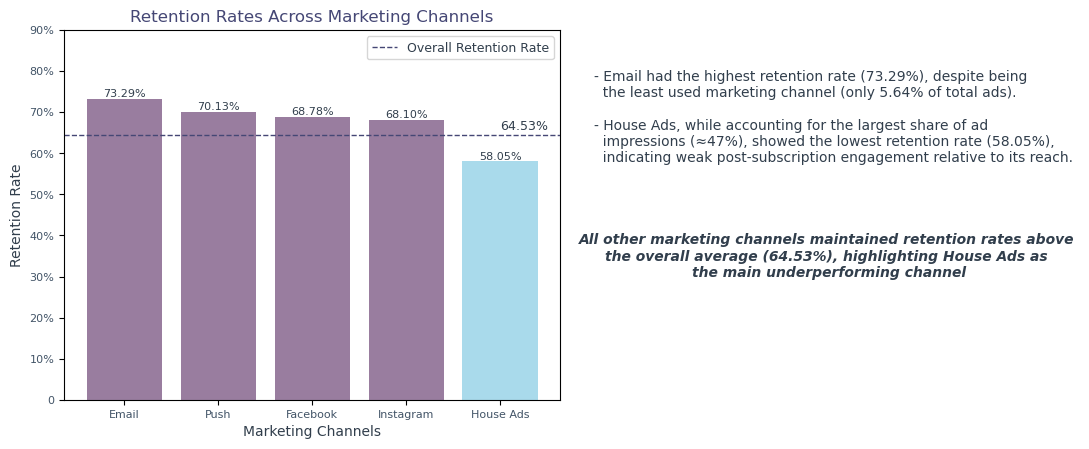

In [405]:
# Visualization - Conversion Rates Across Marketing Channels: 
# Data
x= conversion.channel.to_list()
y= conversion.conversion_rate

# Defining colors based on performance
colors = ['#805D87' if n > conversion_rate else '#94D1E7' for n in y] 

# Creating the chart
plt.bar(x,y, color=colors, alpha=.8)
plt.axhline(y=conversion_rate, color='#454775', linestyle='--', linewidth=1, label='Overall Conversion Rate', alpha=1)

# Customizing the chart
plt.title('Conversion Rates Across Marketing Channels', fontsize=12,color='#454775')
plt.xlabel('Marketing Channels', fontsize=10, color='#313E4C')
plt.xticks(fontsize=8,color='#415366')
plt.ylabel('Conversion Rate', fontsize=10, color='#313E4C')
plt.yticks([0,.05,.1,.15,.2,.25,.3],['0','5%','10%','15%','20%','25%','30%'], fontsize=8,color='#415366')
plt.legend(fontsize=9,labelcolor='#313E4C')

# Annotating chart with values
plt.text(4,.14, '13.92%', ha= 'left', va ='bottom',color='#313E4C', fontsize=9)
for i,v in enumerate(y):
    plt.text(i,v-.02,f'{v:.2%}',va='bottom',ha='center', fontsize=8,color='#313E4C')

# Findings 
text='''
- Email had the highest conversion rate (29.11%), despite being 
  the least used marketing channel (only 5.64% of total ads).\n
- House Ads, while accounting for the largest share of ad 
  impressions (≈47%), showed the lowest conversion rate (7.51%), 
  indicating poor effectiveness relative to its reach.\n'''
text2='''
This contrast highlights that while Email campaigns are 
highly effective, the heavy reliance on House Ads may not be 
an efficient use of resources. \n
A redistribution of ad exposure toward higher-performing 
channels could improve overall conversion results.'''
plt.text(5,.17,text, color='#313E4C')
plt.text(7.5,.06,text2, ha='center',fontstyle='italic',weight='semibold', fontsize=10, color='#313E4C')
plt.show();

# Visualization - Retention Rates Across Marketing Channels: 
# Data
x= retention.channel.to_list()
y= retention.retention_rate

# Defining colors based on performance
colors = ['#805D87' if n > retention_rate else '#94D1E7' for n in y] 

# Creating the chart
plt.bar(x,y, color=colors, alpha=.8)
plt.axhline(y=retention_rate, color='#454775', linestyle='--', linewidth=1, label='Overall Retention Rate', alpha=1)

# Customizing the chart
plt.title('Retention Rates Across Marketing Channels', fontsize=12, color='#454775')
plt.xlabel('Marketing Channels', fontsize=10, color='#313E4C')
plt.xticks(fontsize=8,color='#415366')
plt.ylabel('Retention Rate', fontsize=10, color='#313E4C')
plt.yticks([0,.1,.2,.3,.4,.5,.6,.7,.8,.9],['0','10%','20%','30%','40%','50%','60%','70%','80%','90%'], fontsize=8,color='#415366')
plt.legend(fontsize=9,labelcolor='#313E4C')

# Annotating chart with values
plt.text(4,.65, '64.53%', ha= 'left', va ='bottom',color='#313E4C', fontsize=9)
for i,v in enumerate(y):
    plt.text(i,v,f'{v:.2%}',va='bottom',ha='center', fontsize=8,color='#313E4C')

# Findings 
text='''
- Email had the highest retention rate (73.29%), despite being 
  the least used marketing channel (only 5.64% of total ads).\n
- House Ads, while accounting for the largest share of ad 
  impressions (≈47%), showed the lowest retention rate (58.05%), 
  indicating weak post-subscription engagement relative to its reach.\n
'''
text2='''
All other marketing channels maintained retention rates above 
the overall average (64.53%), highlighting House Ads as 
the main underperforming channel'''
plt.text(5,.5,text, color='#313E4C')
plt.text(7.5,.3,text2, ha='center',fontstyle='italic',weight='semibold', fontsize=10, color='#313E4C')
plt.show();

In [148]:
# Comparing Conversion Rates with Retention Rates Across Marketing Channels: 
performance_ch=conversion.merge(retention,on='channel').loc[:,['channel','conversion_rate','retention_rate']]
performance_ch.style.hide().format({'conversion_rate':'{:,.2%}','retention_rate':'{:,.2%}'})

channel,conversion_rate,retention_rate
Email,29.11%,73.29%
Instagram,13.33%,68.10%
Facebook,12.57%,68.78%
Push,7.92%,70.13%
House Ads,7.51%,58.05%


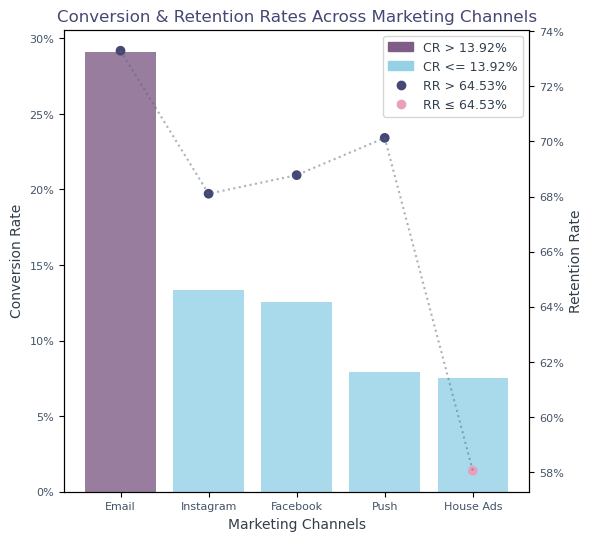

In [265]:
# Data
x=performance_ch.channel.to_list()
y=performance_ch.conversion_rate
z=performance_ch.retention_rate

# Defining colors based on performance
colors = ['#805D87' if n > conversion_rate else '#94D1E7' for n in y] 
colors2= ['#454775' if m > retention_rate else '#EA9FBB' for m in z]

# Creating the chart 
# 1- Conversion Rate (Bar)
fig,ax1=plt.subplots(figsize=(6, 6))
ax1.bar(x,y, alpha=.8, color=colors, label='Conversion Rate')
# 2- Retention Rate
ax2 = ax1.twinx()
ax2.plot(x,z, ls='dotted', color='#51687F', label='Retention Rate', alpha=.5)
ax2.scatter(x,z,color=colors2,label=['CR > 64.53%','CR <= 64.53%'])

# Customizing the chart
plt.title('Conversion & Retention Rates Across Marketing Channels', fontsize=12, color='#454775')
ax1.set_xlabel('Marketing Channels', fontsize=10,color='#313E4C')
ax1.tick_params(axis='x',labelcolor='#415366',labelsize=8) 
ax1.set_ylabel('Conversion Rate', fontsize=10,color='#313E4C')
ax1.tick_params(axis='y',labelcolor='#415366',labelsize=8)
ax1.yaxis.set_major_formatter(mticker.PercentFormatter(1,decimals=False)) 
ax2.set_ylabel('Retention Rate', fontsize=10, color='#313E4C')
ax2.tick_params(axis='y',labelcolor='#415366',labelsize=8)
ax2.yaxis.set_major_formatter(mticker.PercentFormatter(1,decimals=False)) 
above = mpatches.Patch(color='#805D87', label='CR > 13.92%')
below = mpatches.Patch(color='#94D1E7', label='CR <= 13.92%')
above_rr = mlines.Line2D([], [], color='#454775', marker='o',linestyle='None',label='RR > 64.53%')
below_rr = mlines.Line2D([], [], color='#EA9FBB', marker='o', linestyle='None',label='RR ≤ 64.53%')
plt.legend(handles=[above,below,above_rr,below_rr],fontsize=9,labelcolor='#313E4C')
#lines, labels = ax1.get_legend_handles_labels()
#lines2, labels2 = ax2.get_legend_handles_labels()
#ax2.legend(lines , labels , loc='upper right');

In [ ]:
# Data
x=performance_ch.channel.to_list()
y=performance_ch.conversion_rate
z=performance_ch.retention_rate

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(6, 6))
ax1.bar(x,y)
ax2 = ax1.twinx()
ax2.plot(x,)
# Bar chart for conversion rate
bars = ax1.bar(df['age_group'], df['conversion_rate'], color='skyblue', label='Conversion Rate')
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Conversion Rate (%)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.axhline(y=13, color='#805D87', linestyle='--', linewidth=1)

# Line chart for retention rate (second axis)
ax2 = ax1.twinx()
ax2.plot(df['age_group'], df['retention_rate'], color='orange', marker='o', linewidth=2, label='Retention Rate')
ax2.set_ylabel('Retention Rate (%)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Add titles and grid
plt.title('Conversion and Retention Rates by Age Group')
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Combine legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

plt.tight_layout()
plt.show()

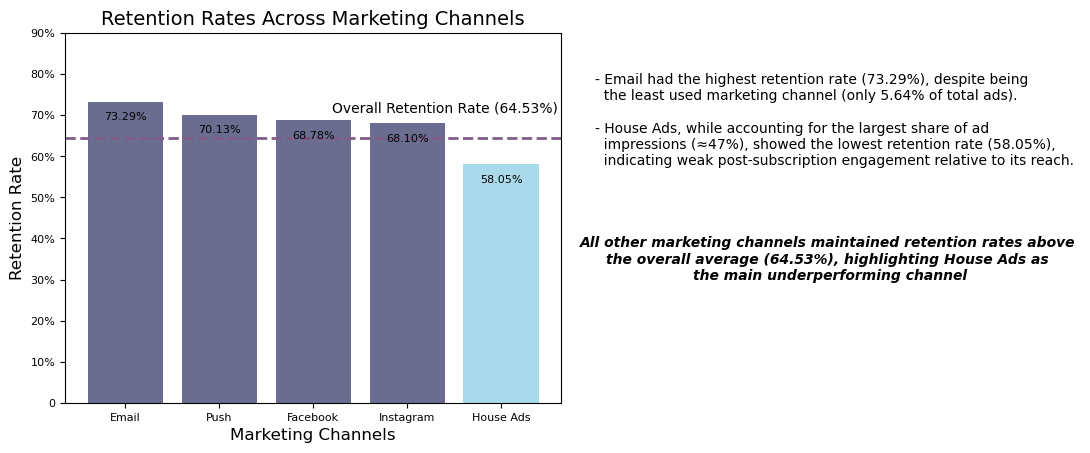

In [46]:
# Visualization: 
# Data
x= retention.channel.to_list()
y= retention.retention_rate

# Defining colors based on performance
colors = ['#454775' if n > retention_rate else '#94D1E7' for n in y] 

# Creating the chart
plt.bar(x,y, color=colors, alpha=.8)
plt.axhline(y=retention_rate, color='#805D87', linestyle='--', linewidth=2, label='Overall RR', alpha=1)

# Customizing the chart
plt.title('Retention Rates Across Marketing Channels', fontsize=14)
plt.xlabel('Marketing Channels', fontsize=12)
plt.xticks(fontsize=8)
plt.ylabel('Retention Rate', fontsize=12)
plt.yticks([0,.1,.2,.3,.4,.5,.6,.7,.8,.9],['0','10%','20%','30%','40%','50%','60%','70%','80%','90%'], fontsize=8)

# Annotating chart with values
plt.text(2.2,.7, 'Overall Retention Rate (64.53%)', ha= 'left', va ='bottom')
for i,v in enumerate(y):
    plt.text(i,v-.05,f'{v:.2%}',va='bottom',ha='center', fontsize=8)

# Findings 
text='''
- Email had the highest retention rate (73.29%), despite being 
  the least used marketing channel (only 5.64% of total ads).\n
- House Ads, while accounting for the largest share of ad 
  impressions (≈47%), showed the lowest retention rate (58.05%), 
  indicating weak post-subscription engagement relative to its reach.\n
'''
text2='''
All other marketing channels maintained retention rates above 
the overall average (64.53%), highlighting House Ads as 
the main underperforming channel'''
plt.text(5,.5,text)
plt.text(7.5,.3,text2, ha='center',fontstyle='italic',weight='semibold', fontsize=10);

In [47]:
# Calculating Conversion Rate across variant classifications
conversion_var=converted_users.groupby('variant').user_id.nunique().reset_index()\
                             .rename(columns={'user_id':'converted'})
users_var = marketing.groupby('variant').user_id.nunique().reset_index()\
                    .rename(columns={'user_id':'total_users'})
conversion =users_var.merge(conversion_var, on ='variant')
conversion['conversion_rate']=conversion['converted']/conversion['total_users']
conversion = conversion.sort_values('conversion_rate', ascending= False)
conversion.style.hide().format({'conversion_rate':'{:,.2%}'})

variant,total_users,converted,conversion_rate
personalization,4089,687,16.80%
control,3704,344,9.29%


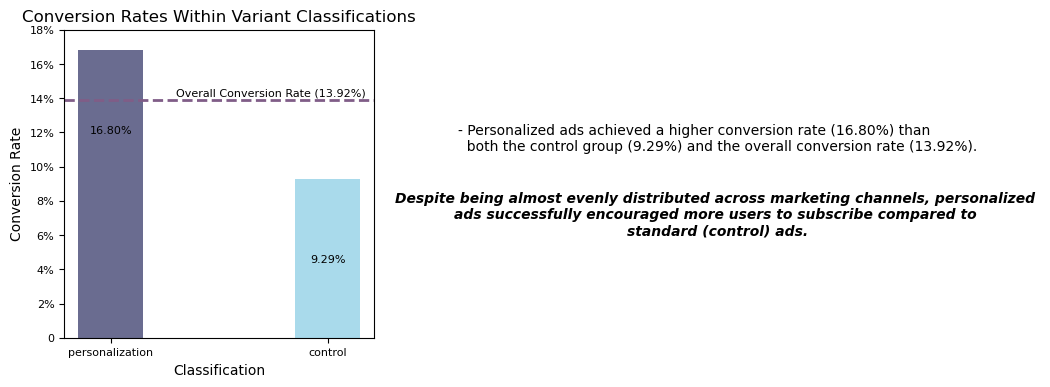

In [48]:
# Visualization: 
# Data
x= conversion.variant.to_list()
y= conversion.conversion_rate

# Defining colors based on performance
colors = ['#454775' if n > conversion_rate else '#94D1E7' for n in y] 

# Creating the chart
plt.subplots(figsize = (4,4))
plt.bar(x,y,width=.3, color=colors,alpha = .8)
plt.axhline(y=conversion_rate, color='#805D87', linestyle='--', linewidth=2, label='Overall CR')

# Customizing the chart
plt.title('Conversion Rates Within Variant Classifications', fontsize=12)
plt.xlabel('Classification', fontsize=10)
plt.xticks(fontsize=8)
plt.ylabel('Conversion Rate', fontsize=10)
plt.yticks([0,.02,.04,.06,.08,.1,.12,.14,.16,.18],['0','2%','4%','6%','8%','10%','12%','14%','16%','18%'], fontsize=8)

# Annotating chart with values
plt.text(.3,.14, 'Overall Conversion Rate (13.92%)', ha= 'left', va ='bottom', fontsize=8)
for i,v in enumerate(y):
    plt.text(i,v-.05,f'{v:.2%}',va='bottom',ha='center', fontsize=8)

# Findings 
text='''
- Personalized ads achieved a higher conversion rate (16.80%) than 
  both the control group (9.29%) and the overall conversion rate (13.92%).\n'''
text2='''
Despite being almost evenly distributed across marketing channels, personalized 
ads successfully encouraged more users to subscribe compared to 
standard (control) ads.'''
plt.text(1.6,.1,text)
plt.text(2.8,.06,text2, ha='center',fontstyle='italic',weight='semibold', fontsize=10);

In [49]:
# Calculating Retention Rate witnin Variant Classifications
retained_var=retained_users.groupby('variant').user_id.nunique().reset_index()\
                             .rename(columns={'user_id':'retained'})
retention = conversion_var.merge(retained_var, on='variant')
retention['retention_rate']=retention['retained']/retention['converted']
retention=retention.sort_values('retention_rate', ascending=False)
retention.style.hide().format({'retention_rate':'{:,.2%}'})

variant,converted,retained,retention_rate
personalization,687,455,66.23%
control,344,216,62.79%


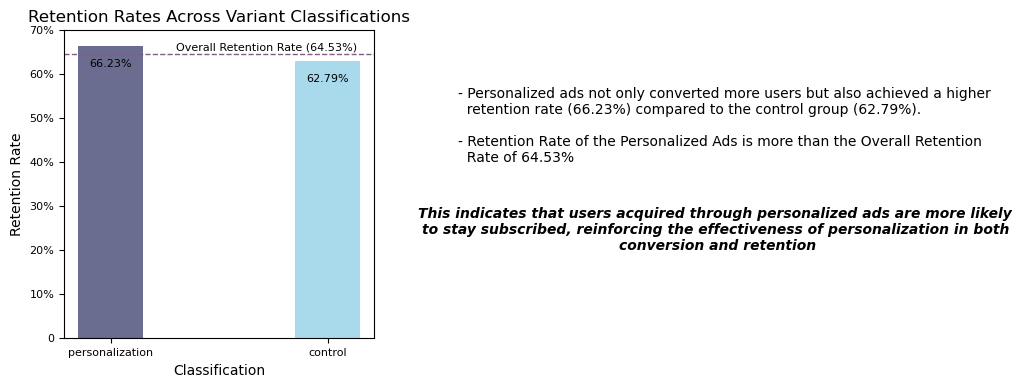

In [50]:
# Visualization: 
# Data
x= retention.variant.to_list()
y= retention.retention_rate

# Defining colors based on performance
colors = ['#454775' if n > retention_rate else '#94D1E7' for n in y] 

# Creating the chart
plt.subplots(figsize = (4,4))
plt.bar(x,y,width=.3, color=colors,alpha = .8)
plt.axhline(y=retention_rate, color='#805D87', linestyle='--', linewidth=1)

# Customizing the chart
plt.title('Retention Rates Across Variant Classifications', fontsize=12)
plt.xlabel('Classification', fontsize=10)
plt.xticks(fontsize=8)
plt.ylabel('Retention Rate', fontsize=10)
plt.yticks([0,.1,.2,.3,.4,.5,.6,.7],['0','10%','20%','30%','40%','50%','60%','70%'], fontsize=8)

# Annotating chart with values
plt.text(.3,.65, 'Overall Retention Rate (64.53%)', ha= 'left', va ='bottom', fontsize=8)
for i,v in enumerate(y):
    plt.text(i,v-.05,f'{v:.2%}',va='bottom',ha='center', fontsize=8)

# Findings 
text='''
- Personalized ads not only converted more users but also achieved a higher 
  retention rate (66.23%) compared to the control group (62.79%).\n
- Retention Rate of the Personalized Ads is more than the Overall Retention 
  Rate of 64.53%'''
text2='''
This indicates that users acquired through personalized ads are more likely 
to stay subscribed, reinforcing the effectiveness of personalization in both 
conversion and retention'''
plt.text(1.6,.4,text)
plt.text(2.8,.2,text2, ha='center',fontstyle='italic',weight='semibold', fontsize=10);

In [51]:
# Calculating Conversion Rate across Matched Languages
conversion_lang=converted_users.groupby('matched_lang').user_id.nunique().reset_index()\
                             .rename(columns={'matched_lang':'language_status','user_id':'converted'})
users_lang = marketing.groupby('matched_lang').user_id.nunique().reset_index()\
                    .rename(columns={'matched_lang':'language_status','user_id':'total_users'})
conversion =users_lang.merge(conversion_lang, on ='language_status')
conversion['conversion_rate']=conversion['converted']/conversion['total_users']
conversion['language_status']=np.where(conversion['language_status']==True,'Matched','Not_Matched')
conversion=conversion.sort_values('conversion_rate',ascending=False)
conversion.style.hide().format({'conversion_rate':'{:,.2%}'})

language_status,total_users,converted,conversion_rate
Matched,6975,988,14.16%
Not_Matched,403,27,6.70%


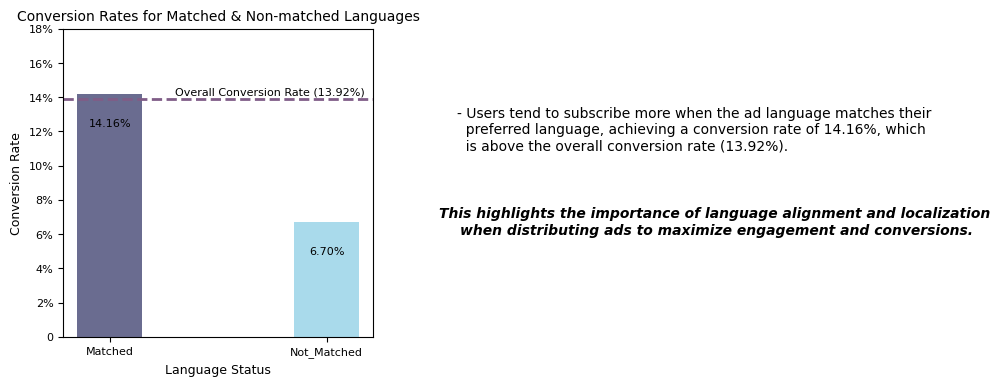

In [52]:
# Visualization: 
# Data
x= conversion.language_status.to_list()
y= conversion.conversion_rate
# Defining colors based on performance
colors = ['#454775' if n > conversion_rate else '#94D1E7' for n in y] 

# Creating the chart
plt.subplots(figsize = (4,4))
plt.bar(x,y,width=.3, color=colors,alpha = .8)
plt.axhline(y=conversion_rate, color='#805D87', linestyle='--', linewidth=2, label='Overall CR')

# Customizing the chart
plt.title('Conversion Rates for Matched & Non-matched Languages', fontsize=10)
plt.xlabel('Language Status', fontsize=9)
plt.xticks(fontsize=8)
plt.ylabel('Conversion Rate', fontsize=9)
plt.yticks([0,.02,.04,.06,.08,.1,.12,.14,.16,.18],['0','2%','4%','6%','8%','10%','12%','14%','16%','18%'], fontsize=8)

# Annotating chart with values
plt.text(.3,.14, 'Overall Conversion Rate (13.92%)', ha= 'left', va ='bottom', fontsize=8)
for i,v in enumerate(sorted(y,reverse=True)):
    plt.text(i,v-.02,f'{v:.2%}',va='bottom',ha='center', fontsize=8)

# Findings 
text='''
- Users tend to subscribe more when the ad language matches their 
  preferred language, achieving a conversion rate of 14.16%, which 
  is above the overall conversion rate (13.92%).\n'''
text2='''
This highlights the importance of language alignment and localization 
when distributing ads to maximize engagement and conversions.'''
plt.text(1.6,.1,text)
plt.text(2.8,.06,text2, ha='center',fontstyle='italic',weight='semibold', fontsize=10);

In [53]:
# Calculating Retention Rate witnin Variant Classifications
retained_lang=retained_users.groupby('matched_lang').user_id.nunique().reset_index()\
                             .rename(columns={'matched_lang':'language_status','user_id':'retained'})
retention = conversion_lang.merge(retained_lang, on='language_status')
retention['retention_rate']=retention['retained']/retention['converted']
retention['language_status']=np.where(retention['language_status']==True,'Matched','Not_Matched')
retention=retention.sort_values('retention_rate', ascending=False)
retention.style.hide().format({'retention_rate':'{:,.2%}'})

language_status,converted,retained,retention_rate
Matched,988,642,64.98%
Not_Matched,27,13,48.15%


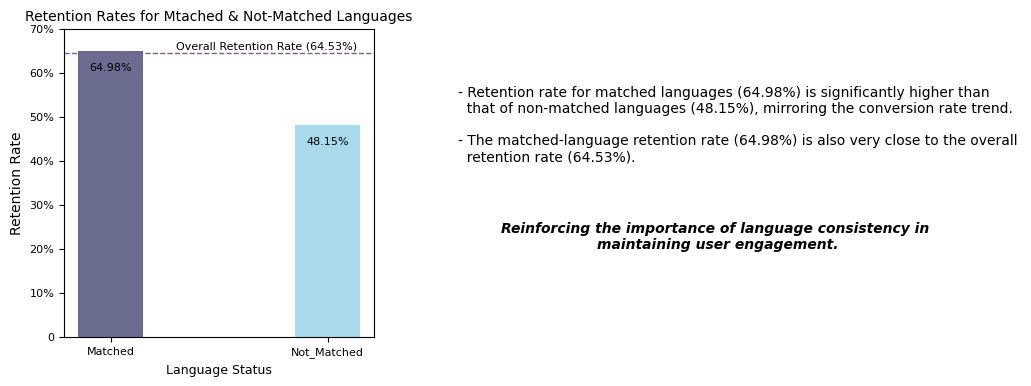

In [54]:
# Visualization: 
# Data
x= retention.language_status.to_list()
y= retention.retention_rate

# Defining colors based on performance
colors = ['#454775' if n > retention_rate else '#94D1E7' for n in y] 

# Creating the chart
plt.subplots(figsize = (4,4))
plt.bar(x,y,width=.3, color=colors,alpha = .8)
plt.axhline(y=retention_rate, color='#805D87', linestyle='--', linewidth=1)

# Customizing the chart
plt.title('Retention Rates for Mtached & Not-Matched Languages', fontsize=10)
plt.xlabel('Language Status', fontsize=9)
plt.xticks(fontsize=8)
plt.ylabel('Retention Rate', fontsize=10)
plt.yticks([0,.1,.2,.3,.4,.5,.6,.7],['0','10%','20%','30%','40%','50%','60%','70%'], fontsize=8)

# Annotating chart with values
plt.text(.3,.65, 'Overall Retention Rate (64.53%)', ha= 'left', va ='bottom', fontsize=8)
for i,v in enumerate(y):
    plt.text(i,v-.05,f'{v:.2%}',va='bottom',ha='center', fontsize=8)

# Findings 
text='''
- Retention rate for matched languages (64.98%) is significantly higher than
  that of non-matched languages (48.15%), mirroring the conversion rate trend.\n
- The matched-language retention rate (64.98%) is also very close to the overall 
  retention rate (64.53%).'''
text2='''
Reinforcing the importance of language consistency in 
maintaining user engagement.'''
plt.text(1.6,.4,text)
plt.text(2.8,.2,text2, ha='center',fontstyle='italic',weight='semibold', fontsize=10);

In [55]:
# Calculating Conversion Rate across variant classifications
conversion_age=converted_users.groupby('age_group').user_id.nunique().reset_index()\
                             .rename(columns={'user_id':'converted'})
users_age = marketing.groupby('age_group').user_id.nunique().reset_index()\
                    .rename(columns={'user_id':'total_users'})
conversion =users_age.merge(conversion_age, on ='age_group')
conversion['conversion_rate']=conversion['converted']/conversion['total_users']
conversion = conversion.sort_values('conversion_rate', ascending= False)
conversion.style.hide().format({'conversion_rate':'{:,.2%}'})

age_group,total_users,converted,conversion_rate
19-24 years,1304,303,23.24%
24-30 years,1218,228,18.72%
0-18 years,1206,192,15.92%
55+ years,979,76,7.76%
30-36 years,1057,77,7.28%
45-55 years,1056,75,7.10%
36-45 years,1056,74,7.01%


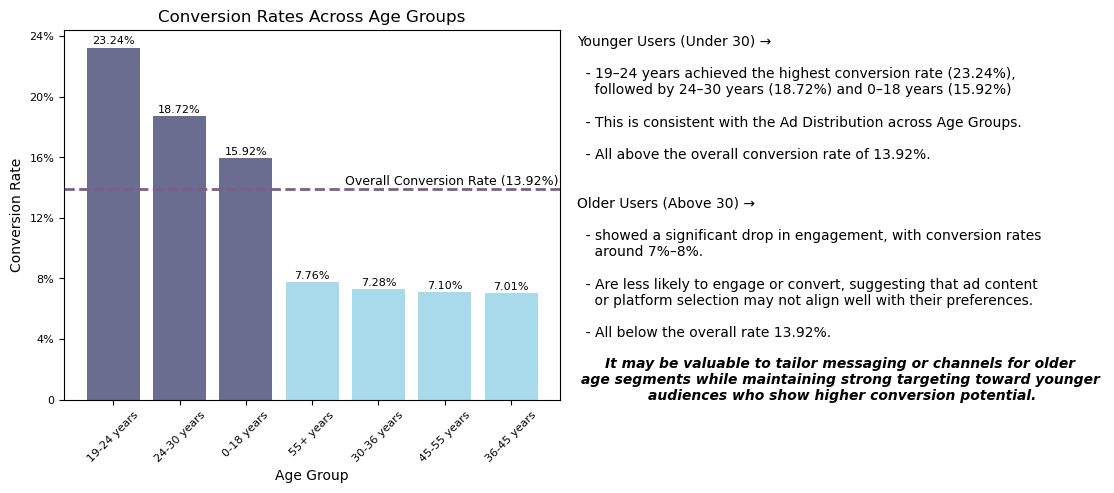

In [56]:
# Visualization: 
# Data
x= conversion.age_group.to_list()
y= conversion.conversion_rate

# Defining colors based on performance
colors = ['#454775' if n > conversion_rate else '#94D1E7' for n in y] 

# Creating the chart
plt.bar(x,y, color=colors,alpha = .8)
plt.axhline(y=conversion_rate, color='#805D87', linestyle='--', linewidth=2, label='Overall CR')

# Customizing the chart
plt.title('Conversion Rates Across Age Groups', fontsize=12)
plt.xlabel('Age Group', fontsize=10)
plt.xticks(fontsize=8,rotation=45)
plt.ylabel('Conversion Rate', fontsize=10)
plt.yticks([0,.04,.08,.12,.16,.20,.24],['0','4%','8%','12%','16%','20%','24%'], fontsize=8)

# Annotating chart with values
plt.text(3.5,.14, 'Overall Conversion Rate (13.92%)', ha= 'left', va ='bottom', fontsize=9)
for i,v in enumerate(y):
    plt.text(i,v+.001,f'{v:.2%}',va='bottom',ha='center', fontsize=8)

# Findings 
text='''
Younger Users (Under 30) → \n
  - 19–24 years achieved the highest conversion rate (23.24%), 
    followed by 24–30 years (18.72%) and 0–18 years (15.92%)\n
  - This is consistent with the Ad Distribution across Age Groups.\n 
  - All above the overall conversion rate of 13.92%.\n\n
Older Users (Above 30) → \n
  - showed a significant drop in engagement, with conversion rates 
    around 7%–8%. \n
  - Are less likely to engage or convert, suggesting that ad content 
    or platform selection may not align well with their preferences.\n
  - All below the overall rate 13.92%.\n\n'''
text2='''
It may be valuable to tailor messaging or channels for older 
age segments while maintaining strong targeting toward younger 
audiences who show higher conversion potential.'''
plt.text(7,.02,text)
plt.text(11,0,text2, ha='center',fontstyle='italic',weight='semibold', fontsize=10);

In [57]:
# Calculating Retention Rate witnin Variant Classifications
retained_age=retained_users.groupby('age_group').user_id.nunique().reset_index()\
                             .rename(columns={'user_id':'retained'})
retention = conversion_age.merge(retained_age, on='age_group')
retention['retention_rate']=retention['retained']/retention['converted']
retention=retention.sort_values('retention_rate', ascending=False)
retention.style.hide().format({'retention_rate':'{:,.2%}'})

age_group,converted,retained,retention_rate
19-24 years,303,209,68.98%
24-30 years,228,153,67.11%
55+ years,76,51,67.11%
0-18 years,192,124,64.58%
30-36 years,77,46,59.74%
36-45 years,74,41,55.41%
45-55 years,75,41,54.67%


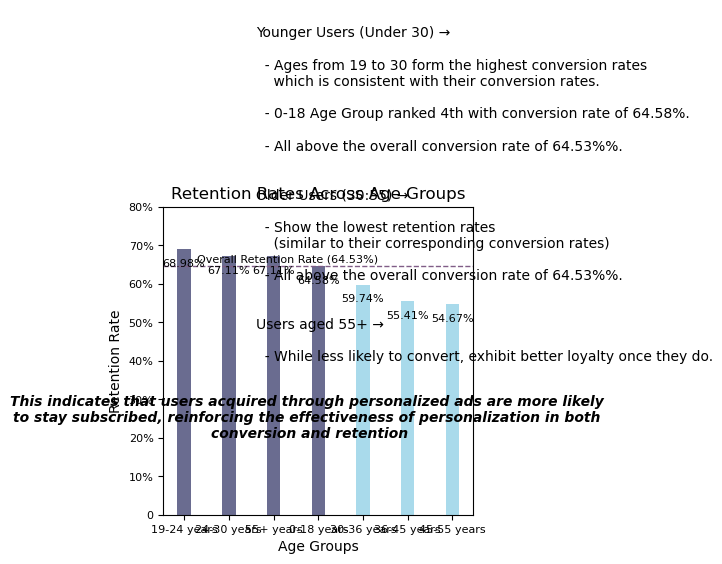

In [58]:
# Visualization: 
# Data
x= retention.age_group.to_list()
y= retention.retention_rate

# Defining colors based on performance
colors = ['#454775' if n > retention_rate else '#94D1E7' for n in y] 

# Creating the chart
plt.subplots(figsize = (4,4))
plt.bar(x,y,width=.3, color=colors,alpha = .8)
plt.axhline(y=retention_rate, color='#805D87', linestyle='--', linewidth=1)

# Customizing the chart
plt.title('Retention Rates Across Age Groups', fontsize=12)
plt.xlabel('Age Groups', fontsize=10)
plt.xticks(fontsize=8)
plt.ylabel('Retention Rate', fontsize=10)
plt.yticks([0,.1,.2,.3,.4,.5,.6,.7,.8],['0','10%','20%','30%','40%','50%','60%','70%','80%'], fontsize=8)

# Annotating chart with values
plt.text(.3,.65, 'Overall Retention Rate (64.53%)', ha= 'left', va ='bottom', fontsize=8)
for i,v in enumerate(y):
    plt.text(i,v-.05,f'{v:.2%}',va='bottom',ha='center', fontsize=8)

# Findings 
text='''
Younger Users (Under 30) →\n
  - Ages from 19 to 30 form the highest conversion rates
    which is consistent with their conversion rates.\n
  - 0-18 Age Group ranked 4th with conversion rate of 64.58%.\n
  - All above the overall conversion rate of 64.53%%.\n\n
Older Users (30:55) →\n
  - Show the lowest retention rates 
    (similar to their corresponding conversion rates)\n
  - All above the overall conversion rate of 64.53%%. \n\n
Users aged 55+ → \n
  - While less likely to convert, exhibit better loyalty once they do.'''
text2='''
This indicates that users acquired through personalized ads are more likely 
to stay subscribed, reinforcing the effectiveness of personalization in both 
conversion and retention'''
plt.text(1.6,.4,text)
plt.text(2.8,.2,text2, ha='center',fontstyle='italic',weight='semibold', fontsize=10);

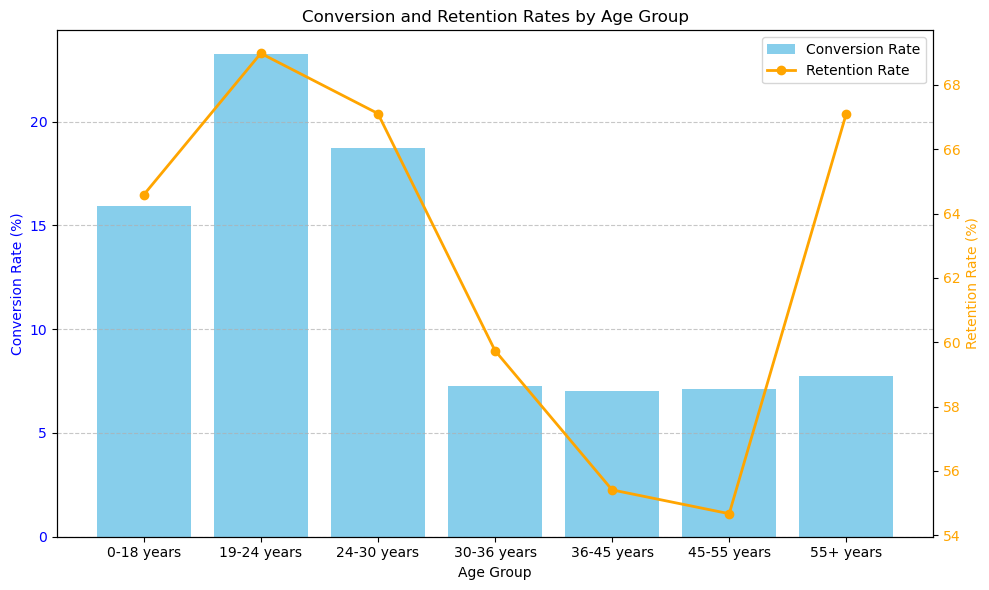

In [162]:
# Data
data = {
    'age_group': ['0-18 years', '19-24 years', '24-30 years', '30-36 years', '36-45 years', '45-55 years', '55+ years'],
    'conversion_rate': [15.92, 23.24, 18.72, 7.28, 7.01, 7.10, 7.76],
    'retention_rate': [64.58, 68.98, 67.11, 59.74, 55.41, 54.67, 67.11]
}

df = pd.DataFrame(data)

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar chart for conversion rate
bars = ax1.bar(df['age_group'], df['conversion_rate'], color='skyblue', label='Conversion Rate')
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Conversion Rate (%)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Line chart for retention rate (second axis)
ax2 = ax1.twinx()
ax2.plot(df['age_group'], df['retention_rate'], color='orange', marker='o', linewidth=2, label='Retention Rate')
ax2.set_ylabel('Retention Rate (%)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Add titles and grid
plt.title('Conversion and Retention Rates by Age Group')
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Combine legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

plt.tight_layout()
plt.show()

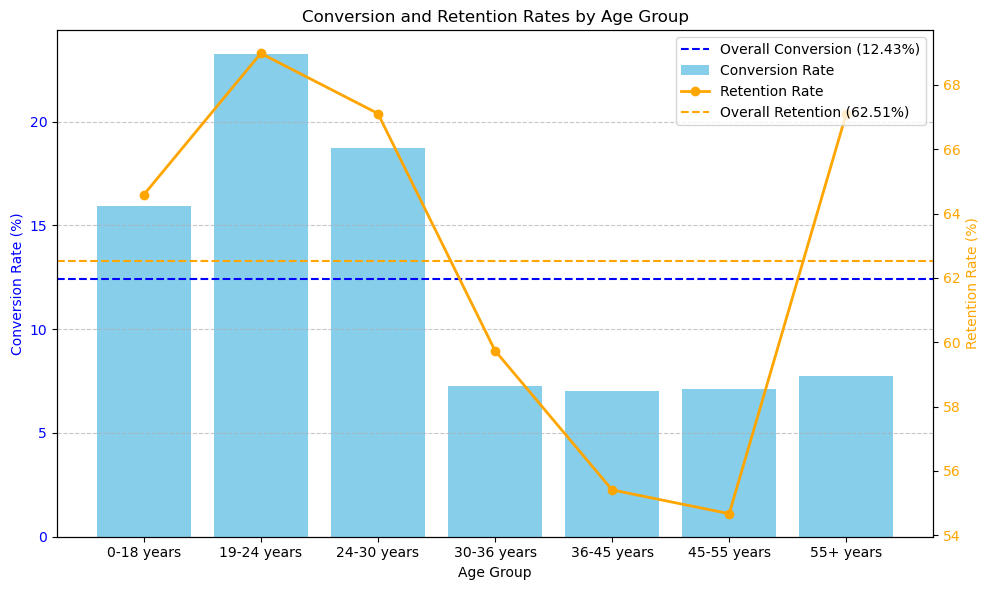

In [60]:
import matplotlib.pyplot as plt
import pandas as pd

# Data
data = {
    'age_group': ['0-18 years', '19-24 years', '24-30 years', '30-36 years', '36-45 years', '45-55 years', '55+ years'],
    'conversion_rate': [15.92, 23.24, 18.72, 7.28, 7.01, 7.10, 7.76],
    'retention_rate': [64.58, 68.98, 67.11, 59.74, 55.41, 54.67, 67.11]
}

df = pd.DataFrame(data)

# Calculate overall averages
overall_conversion = df['conversion_rate'].mean()
overall_retention = df['retention_rate'].mean()

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar chart for conversion rate
bars = ax1.bar(df['age_group'], df['conversion_rate'], color='skyblue', label='Conversion Rate')
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Conversion Rate (%)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Add horizontal line for overall conversion rate
ax1.axhline(overall_conversion, color='blue', linestyle='--', linewidth=1.5, label=f'Overall Conversion ({overall_conversion:.2f}%)')

# Line chart for retention rate (second axis)
ax2 = ax1.twinx()
ax2.plot(df['age_group'], df['retention_rate'], color='orange', marker='o', linewidth=2, label='Retention Rate')
ax2.set_ylabel('Retention Rate (%)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Add horizontal line for overall retention rate
ax2.axhline(overall_retention, color='orange', linestyle='--', linewidth=1.5, label=f'Overall Retention ({overall_retention:.2f}%)')

# Add titles and grid
plt.title('Conversion and Retention Rates by Age Group')
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Combine legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

plt.tight_layout()
plt.show()